0.20013848193


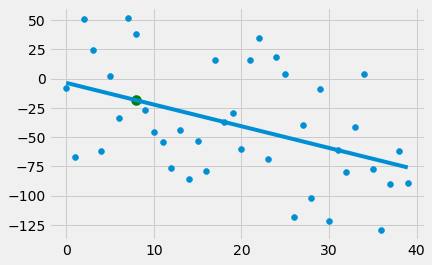

In [11]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

#xs = [1,2,3,4,5,6]
#ys = [5,4,6,5,6,7]


# xs = np.array(xs, dtype = np.float64)
# ys = np.array(ys, dtype = np.float64)

def create_dataset(hm, variance, step=2, correlation=False):
    val =1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

def best_fit_slope_and_inter(xs,ys):
    m= (mean(xs)*mean(ys) - mean(xs*ys)) / (mean(xs)*mean(xs) - mean(xs*xs))
    b = mean(ys) - m*mean(xs)
    return m, b

def sqaured_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

def coef_of_det(ys_orig, ys_line):
    ys_mean_line = [mean(ys_orig) for y in ys_orig]
    sq_er_regr = sqaured_error(ys_orig, ys_line)
    sq_er_y_mean = sqaured_error(ys_orig, ys_mean_line)
    return 1 - sq_er_regr/sq_er_y_mean
  
    
varianceMore=80    
varianceNorm=40    
varianceLess=10    

xs, ys = create_dataset(40,varianceMore,2,correlation='neg')

m,b = best_fit_slope_and_inter(xs,ys)

regression_line = [(m*x)+b for x in xs]

predict_x = 8
predict_y = (m*predict_x)+b

r_sq = coef_of_det(ys, regression_line)
print(r_sq)

plt.scatter(xs,ys)
plt.scatter(predict_x, predict_y, s=100, color='green')
plt.plot(xs, regression_line)
plt.show()

